<a href="https://colab.research.google.com/github/VarelAntoni/machine_learning_project/blob/main/plane_price_prediction/plane_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os


In [176]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rafsunahmad/plane-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rafsunahmad/plane-price-prediction/versions/1


In [177]:
print(os.listdir(path))

['Plane Price.csv']


In [178]:
df = pd.read_csv(os.path.join(path, 'Plane Price.csv'))

In [179]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [181]:
df = df.rename(columns={'Model Name': 'model'})
df = df.rename(columns={'Engine Type': 'engine'})
df = df.rename(columns={'HP or lbs thr ea engine': 'HP'})
df = df.rename(columns={'Max speed Knots': 'speed'})
df = df.rename(columns={'Rcmnd cruise Knots': 'cruise'})
df = df.rename(columns={'Stall Knots dirty': 'stall'})
df = df.rename(columns={'Fuel gal/lbs': 'fuel'})
df = df.rename(columns={'All eng rate of climb': 'all eng rate'})
df = df.rename(columns={'Eng out rate of climb': 'eng out rate'})
df = df.rename(columns={'Takeoff over 50ft': 'takeoff'})
df = df.rename(columns={'Landing over 50ft': 'landing'})
df = df.rename(columns={'Empty weight lbs': 'weight'})
df = df.rename(columns={'Length ft/in': 'length'})
df = df.rename(columns={'Wing span ft/in': 'wingspan'})
df = df.rename(columns={'Range N.M.': 'range'})
df = df.rename(columns={'Price': 'price'})

In [182]:
df.isnull().sum()

,0
model,0
engine,0
HP,0
speed,20
cruise,10
stall,15
fuel,0
all eng rate,4
eng out rate,26
takeoff,25


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         517 non-null    object 
 1   engine        517 non-null    object 
 2   HP            517 non-null    object 
 3   speed         497 non-null    object 
 4   cruise        507 non-null    float64
 5   stall         502 non-null    float64
 6   fuel          517 non-null    int64  
 7   all eng rate  513 non-null    object 
 8   eng out rate  491 non-null    float64
 9   takeoff       492 non-null    float64
 10  landing       517 non-null    object 
 11  weight        516 non-null    object 
 12  length        517 non-null    object 
 13  wingspan      517 non-null    object 
 14  range         499 non-null    object 
 15  price         507 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 64.8+ KB


In [184]:
df['engine'] = df['engine'].str.replace('piston', 'Piston').astype(str)
df = pd.get_dummies(df,columns=['engine'],drop_first=True)


df['HP'] = df['HP'].str.replace(r'[^\d,]', '', regex=True)
df['HP'] = df['HP'].str.replace(',', '').astype(float)


df['speed'] = df['speed'].str.replace(r'[^\d,]', '', regex=True)
df['speed'] = df['speed'].str.replace(',', '').astype(float)
df['speed'] = df['speed'].fillna(df['speed'].median())


df['cruise'] = df['cruise'].fillna(df['cruise'].median())


df['stall'] = df['stall'].fillna(df['stall'].median())


df['fuel'] = df['fuel'].fillna(df['fuel'].median())


df['all eng rate'] = df['all eng rate'].str.replace(r'[^\d,]', '', regex=True)
df['all eng rate'] = df['all eng rate'].str.replace(',', '').astype(float)
df['all eng rate'] = df['all eng rate'].fillna(df['all eng rate'].median())


df['eng out rate'] = df['eng out rate'].fillna(df['eng out rate'].median())


df['takeoff'] = df['takeoff'].fillna(df['takeoff'].median())


df['landing'] = df['landing'].str.replace(r'[^\d,]', '', regex=True)
df['landing'] = df['landing'].replace('', np.nan)
df['landing'] = df['landing'].str.replace(',', '').astype(float)
df['landing'] = df['landing'].fillna(df['landing'].median())


df['weight'] = df['weight'].str.replace(r'[^\d,]', '', regex=True)
df['weight'] = df['weight'].str.replace(',', '').astype(float)
df['weight'] = df['weight'].fillna(df['weight'].median())


df['length'] = df['length'].replace(['N/C', 'Orig'], np.nan)


def ft_to_inches(length):
    try:
        ft, inch = length.split('/')
        ft = int(ft)
        inch = int(inch)
        return ft * 12 + inch
    except:
        return np.nan


df['length'] = df['length'].apply(ft_to_inches)
df['length'] = df['length'].fillna(df['length'].median())


df['wingspan'] = df['wingspan'].apply(ft_to_inches)
df['wingspan'] = df['wingspan'].fillna(df['wingspan'].median())


df['range'] = df['range'].str.replace(r'[^\d,]', '', regex=True)
df['range'] = df['range'].str.replace(',', '').astype(float)
df['range'] = df['range'].fillna(df['range'].median())

In [185]:
df.isnull().sum()

,0
model,0
HP,0
speed,0
cruise,0
stall,0
fuel,0
all eng rate,0
eng out rate,0
takeoff,0
landing,0


In [204]:
df = df.dropna()

In [205]:
df.duplicated().sum()

0

In [206]:
df.drop_duplicates(inplace=True)

<ipython-input-206-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


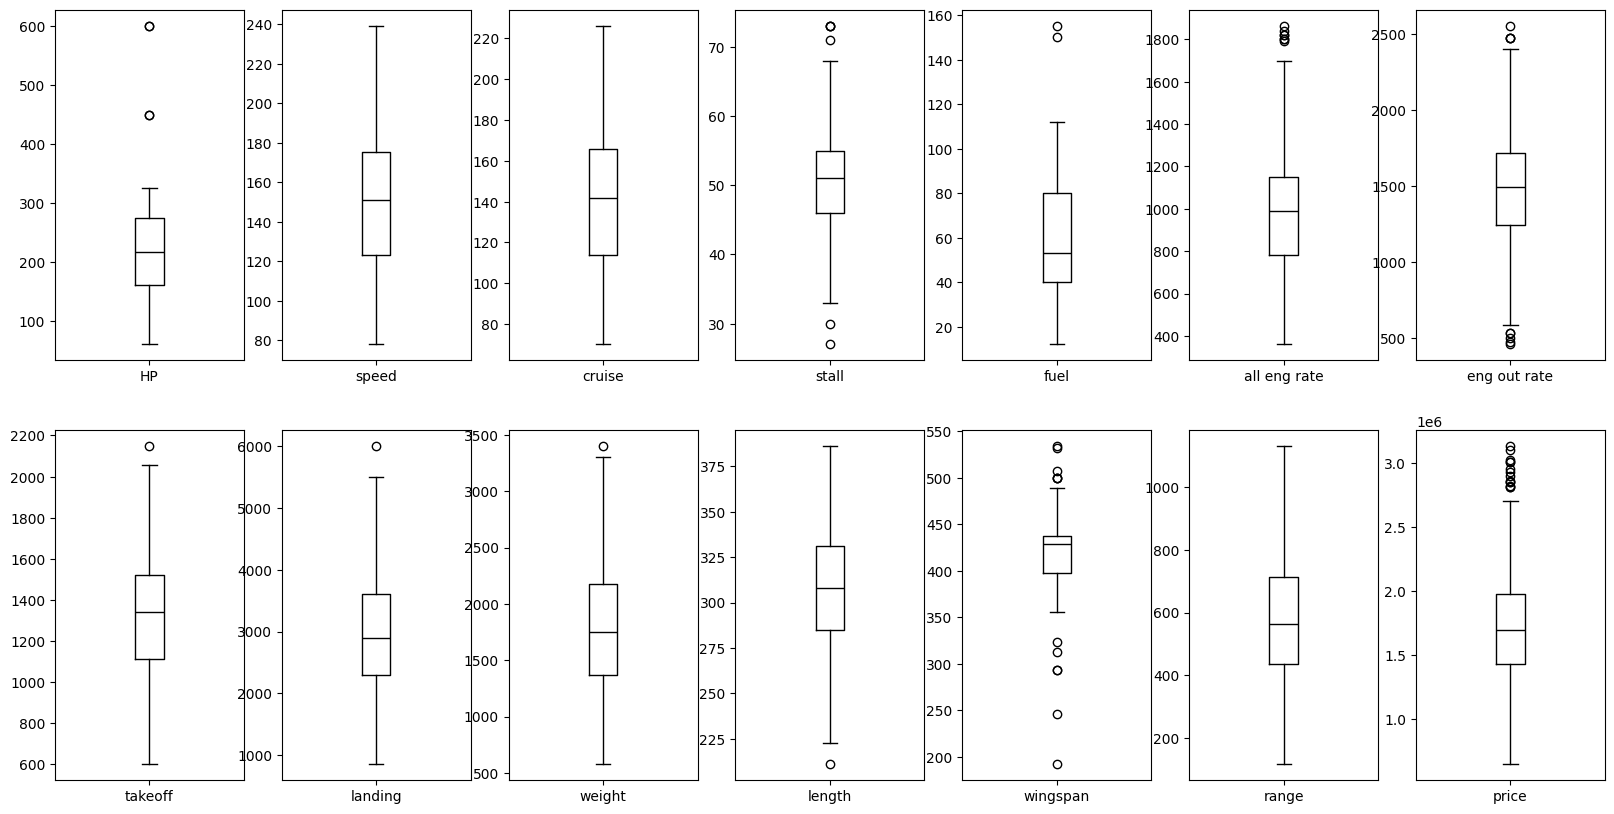

In [207]:
df.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [208]:
numeric_features = ['HP', 'speed', 'cruise', 'stall', 'fuel', 'all eng rate', 'eng out rate', 'takeoff', 'landing', 'weight', 'range']

# Mendefinisikan fungsi untuk mendeteksi dan menampilkan/menghapus outliers
def outliers(data_out, data, drop=False):
    for each_feature in data_out:
        feature_data = data[each_feature]
        Q1 = np.percentile(feature_data, 25.)  # Kuartil 1
        Q3 = np.percentile(feature_data, 75.)  # Kuartil 3
        IQR = Q3 - Q1  # Rentang antar-kuartil
        outlier_step = IQR * 1.5  # Aturan Tukey untuk mendeteksi outlier
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) &
                                  (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace=True, errors='ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(numeric_features, df, drop=False)

For the feature HP, Num of Outliers is 4
For the feature speed, Num of Outliers is 0
For the feature cruise, Num of Outliers is 0
For the feature stall, Num of Outliers is 6
For the feature fuel, Num of Outliers is 2
For the feature all eng rate, Num of Outliers is 7
For the feature eng out rate, Num of Outliers is 9
For the feature takeoff, Num of Outliers is 1
For the feature landing, Num of Outliers is 1
For the feature weight, Num of Outliers is 1
For the feature range, Num of Outliers is 0


In [209]:
outliers(numeric_features, df, drop=True)

Outliers from HP feature removed
Outliers from speed feature removed
Outliers from cruise feature removed
Outliers from stall feature removed
Outliers from fuel feature removed
Outliers from all eng rate feature removed
Outliers from eng out rate feature removed
Outliers from takeoff feature removed
Outliers from landing feature removed
Outliers from weight feature removed
Outliers from range feature removed


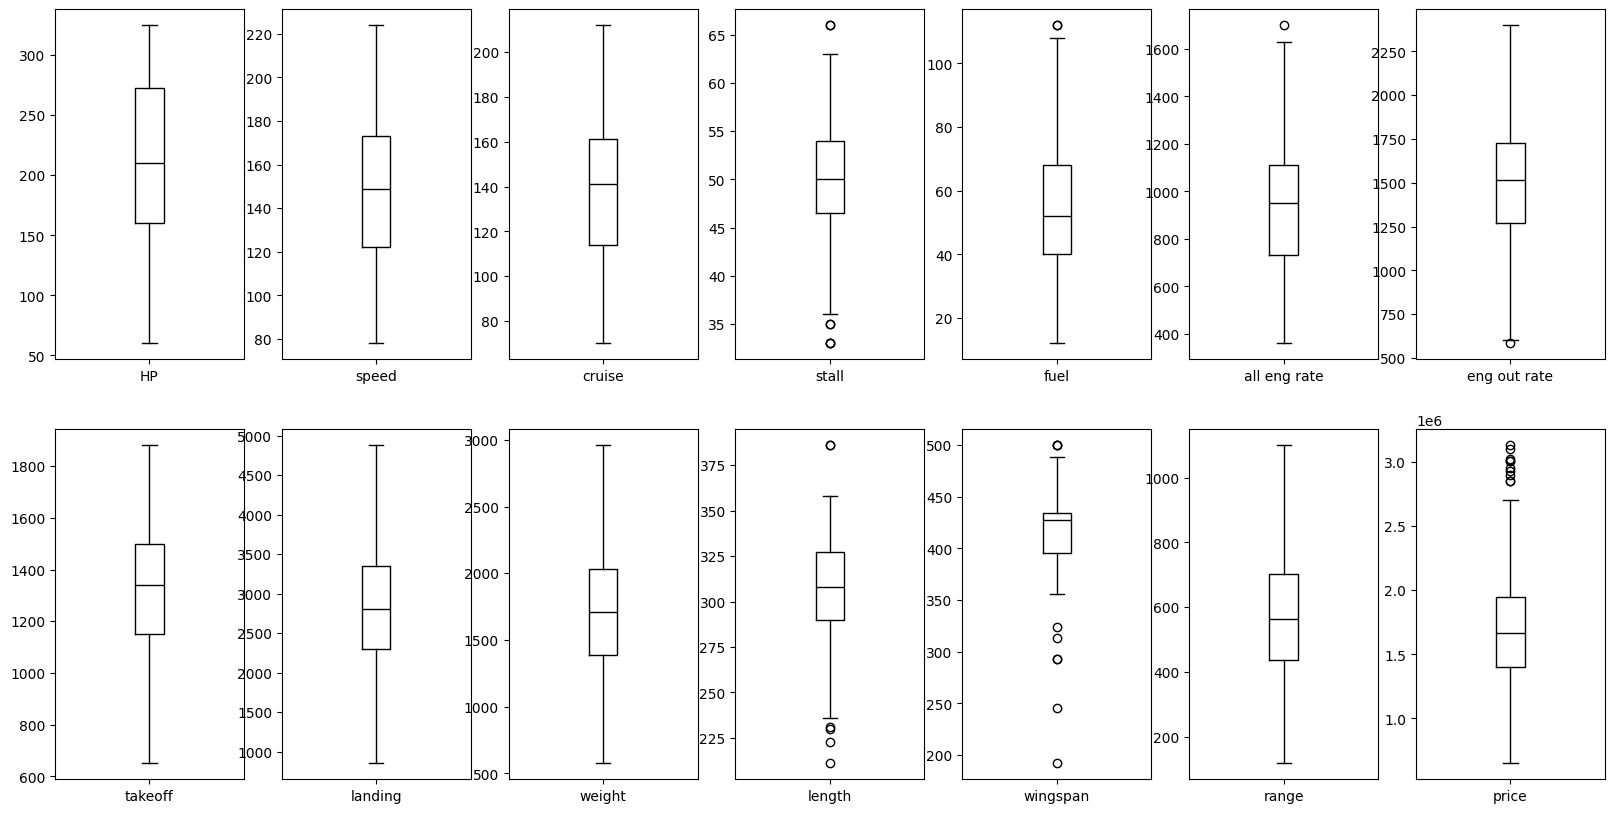

In [210]:
df.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [211]:
X = df.drop(columns=['model', 'price'], axis=1)
y = df['price']

In [212]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [213]:
X.describe()

,HP,speed,cruise,stall,fuel,all eng rate,eng out rate,takeoff,landing,weight,length,wingspan,range
count,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02
mean,-1.393221e-17,-3.343731e-16,8.359326e-17,-4.179663e-16,-1.532543e-16,1.114577e-16,2.055001e-16,3.030256e-16,1.671865e-16,2.786442e-17,-1.950509e-16,5.538054e-16,2.020171e-16
std,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00
min,-2.165302e+00,-2.175644e+00,-2.132303e+00,-2.604771e+00,-1.932329e+00,-2.443006e+00,-2.625999e+00,-2.908272e+00,-2.318804e+00,-2.212286e+00,-3.020492e+00,-6.404116e+00,-2.296529e+00
25%,-7.102411e-01,-8.078664e-01,-7.507450e-01,-5.603287e-01,-7.119107e-01,-8.533720e-01,-6.989325e-01,-7.210467e-01,-6.191010e-01,-6.114213e-01,-5.200682e-01,-6.303224e-01,-6.733515e-01
50%,1.728955e-02,3.145157e-02,9.702920e-02,-3.028804e-02,-1.888743e-01,6.470546e-02,-2.117529e-02,1.100989e-01,-3.299653e-02,1.910331e-02,4.964852e-02,2.753707e-01,-1.999697e-02
75%,9.267029e-01,7.775120e-01,7.250101e-01,5.754727e-01,5.085076e-01,7.447628e-01,5.657485e-01,8.100110e-01,6.117184e-01,6.506100e-01,6.668417e-01,4.451881e-01,6.895052e-01
max,1.690610e+00,2.362890e+00,2.326361e+00,2.392755e+00,2.426308e+00,3.252474e+00,2.452289e+00,2.476677e+00,2.405198e+00,2.472453e+00,2.518421e+00,2.313180e+00,2.721029e+00


In [214]:
y.head()

,price
0,1300000.0
1,1230000.0
4,1250000.0
5,1100000.0
17,1150000.0


In [215]:
df['price'].value_counts()

,count
price,
2000000.0,12
1600000.0,12
1400000.0,7
1810000.0,6
1830000.0,6
...,...
3100000.0,1
2930000.0,1
2250000.0,1


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression: ")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"R2 Score: {r2_linear:.4f}")

Linear Regression: 
Mean Squared Error: 49289346806.1669
R2 Score: 0.6887


In [224]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression:")
print(f"Mean Squared Error: {mse_tree:.4f}")
print(f"R2 Score: {r2_tree:.4f}")


Decision Tree Regression:
Mean Squared Error: 71087140175.4375
R2 Score: 0.5510


In [225]:
# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_forest:.4f}")
print(f"R2 Score: {r2_forest:.4f}")


Random Forest Regression:
Mean Squared Error: 29072625993.8627
R2 Score: 0.8164


In [226]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R2 Score: {r2_ridge:.4f}")


Ridge Regression:
Mean Squared Error: 48984127078.8794
R2 Score: 0.6906


In [227]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R2 Score: {r2_lasso:.4f}")


Lasso Regression:
Mean Squared Error: 49289283058.0889
R2 Score: 0.6887


In [228]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"R2 Score: {r2_gb:.4f}")


Gradient Boosting Regression:
Mean Squared Error: 25299335427.3890
R2 Score: 0.8402


In [234]:
# Membandingkan hasil evaluasi
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge', 'Lasso', 'Gradient Boosting']
mses = [mse_linear, mse_tree, mse_forest, mse_ridge, mse_lasso, mse_gb]
r2s = [r2_linear, r2_tree, r2_forest, r2_ridge, r2_lasso, r2_gb]

comparison_df = pd.DataFrame({'Model': models, 'MSE': mses, 'R2 Score': r2s})
print(comparison_df)


               Model           MSE  R2 Score
0  Linear Regression  4.928935e+10  0.688694
1      Decision Tree  7.108714e+10  0.551021
2      Random Forest  2.907263e+10  0.816380
3              Ridge  4.898413e+10  0.690622
4              Lasso  4.928928e+10  0.688694
5  Gradient Boosting  2.529934e+10  0.840212
